In [28]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
from prettytable import PrettyTable

# Ignore warnings for clean output
warnings.filterwarnings("ignore")


In [29]:
# Load the dataset
df = pd.read_csv('spotify dataset.csv')

# Display the first few rows of the dataframe
df.head()


track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [30]:
# Handle missing values
df.dropna(inplace=True)

# Drop non-numeric columns
columns_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date']
features_to_scale = df.drop(columns_to_drop, axis=1).select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verify the changes
df.head()


track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran          0.941407  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5          0.981439  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson          1.101535  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers          0.701216  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi          1.061503  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ...       key  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  0.173348   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  1.557808   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ... -1.211111   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  0.450240   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ... -1.211111   

   loudness      mode  speechiness  acousticness  instrumentalness  liveness  \
0  1.367040  0.876132    -0.481253     -0.333961         -0.377985 -0.809246   
1  0.585736  0.876132    -0.688547     -0.468726         -0.359210  1.081094   
2  1.100025 -1.141381    -0.324301     -0.436856         -0.377881 -0.519571   
3  0.984251  0.876132    -0.049884     -0.667687         -0.377943  0.089589   
4  0.685114  0.876132    -0.702366     -0.432758         -0.377985 -0.692598   

    valence     tempo  duration_ms  
0  0.031929  0.042833    -0.518802  
1  0.782525 -0.777291    -1.056175  
2  0.439395  0.116133    -0.821933  
3 -1.001750  0.039860    -0.947661  
4  0.919777  0.114944    -0.614097  

[5 rows x 23 columns]

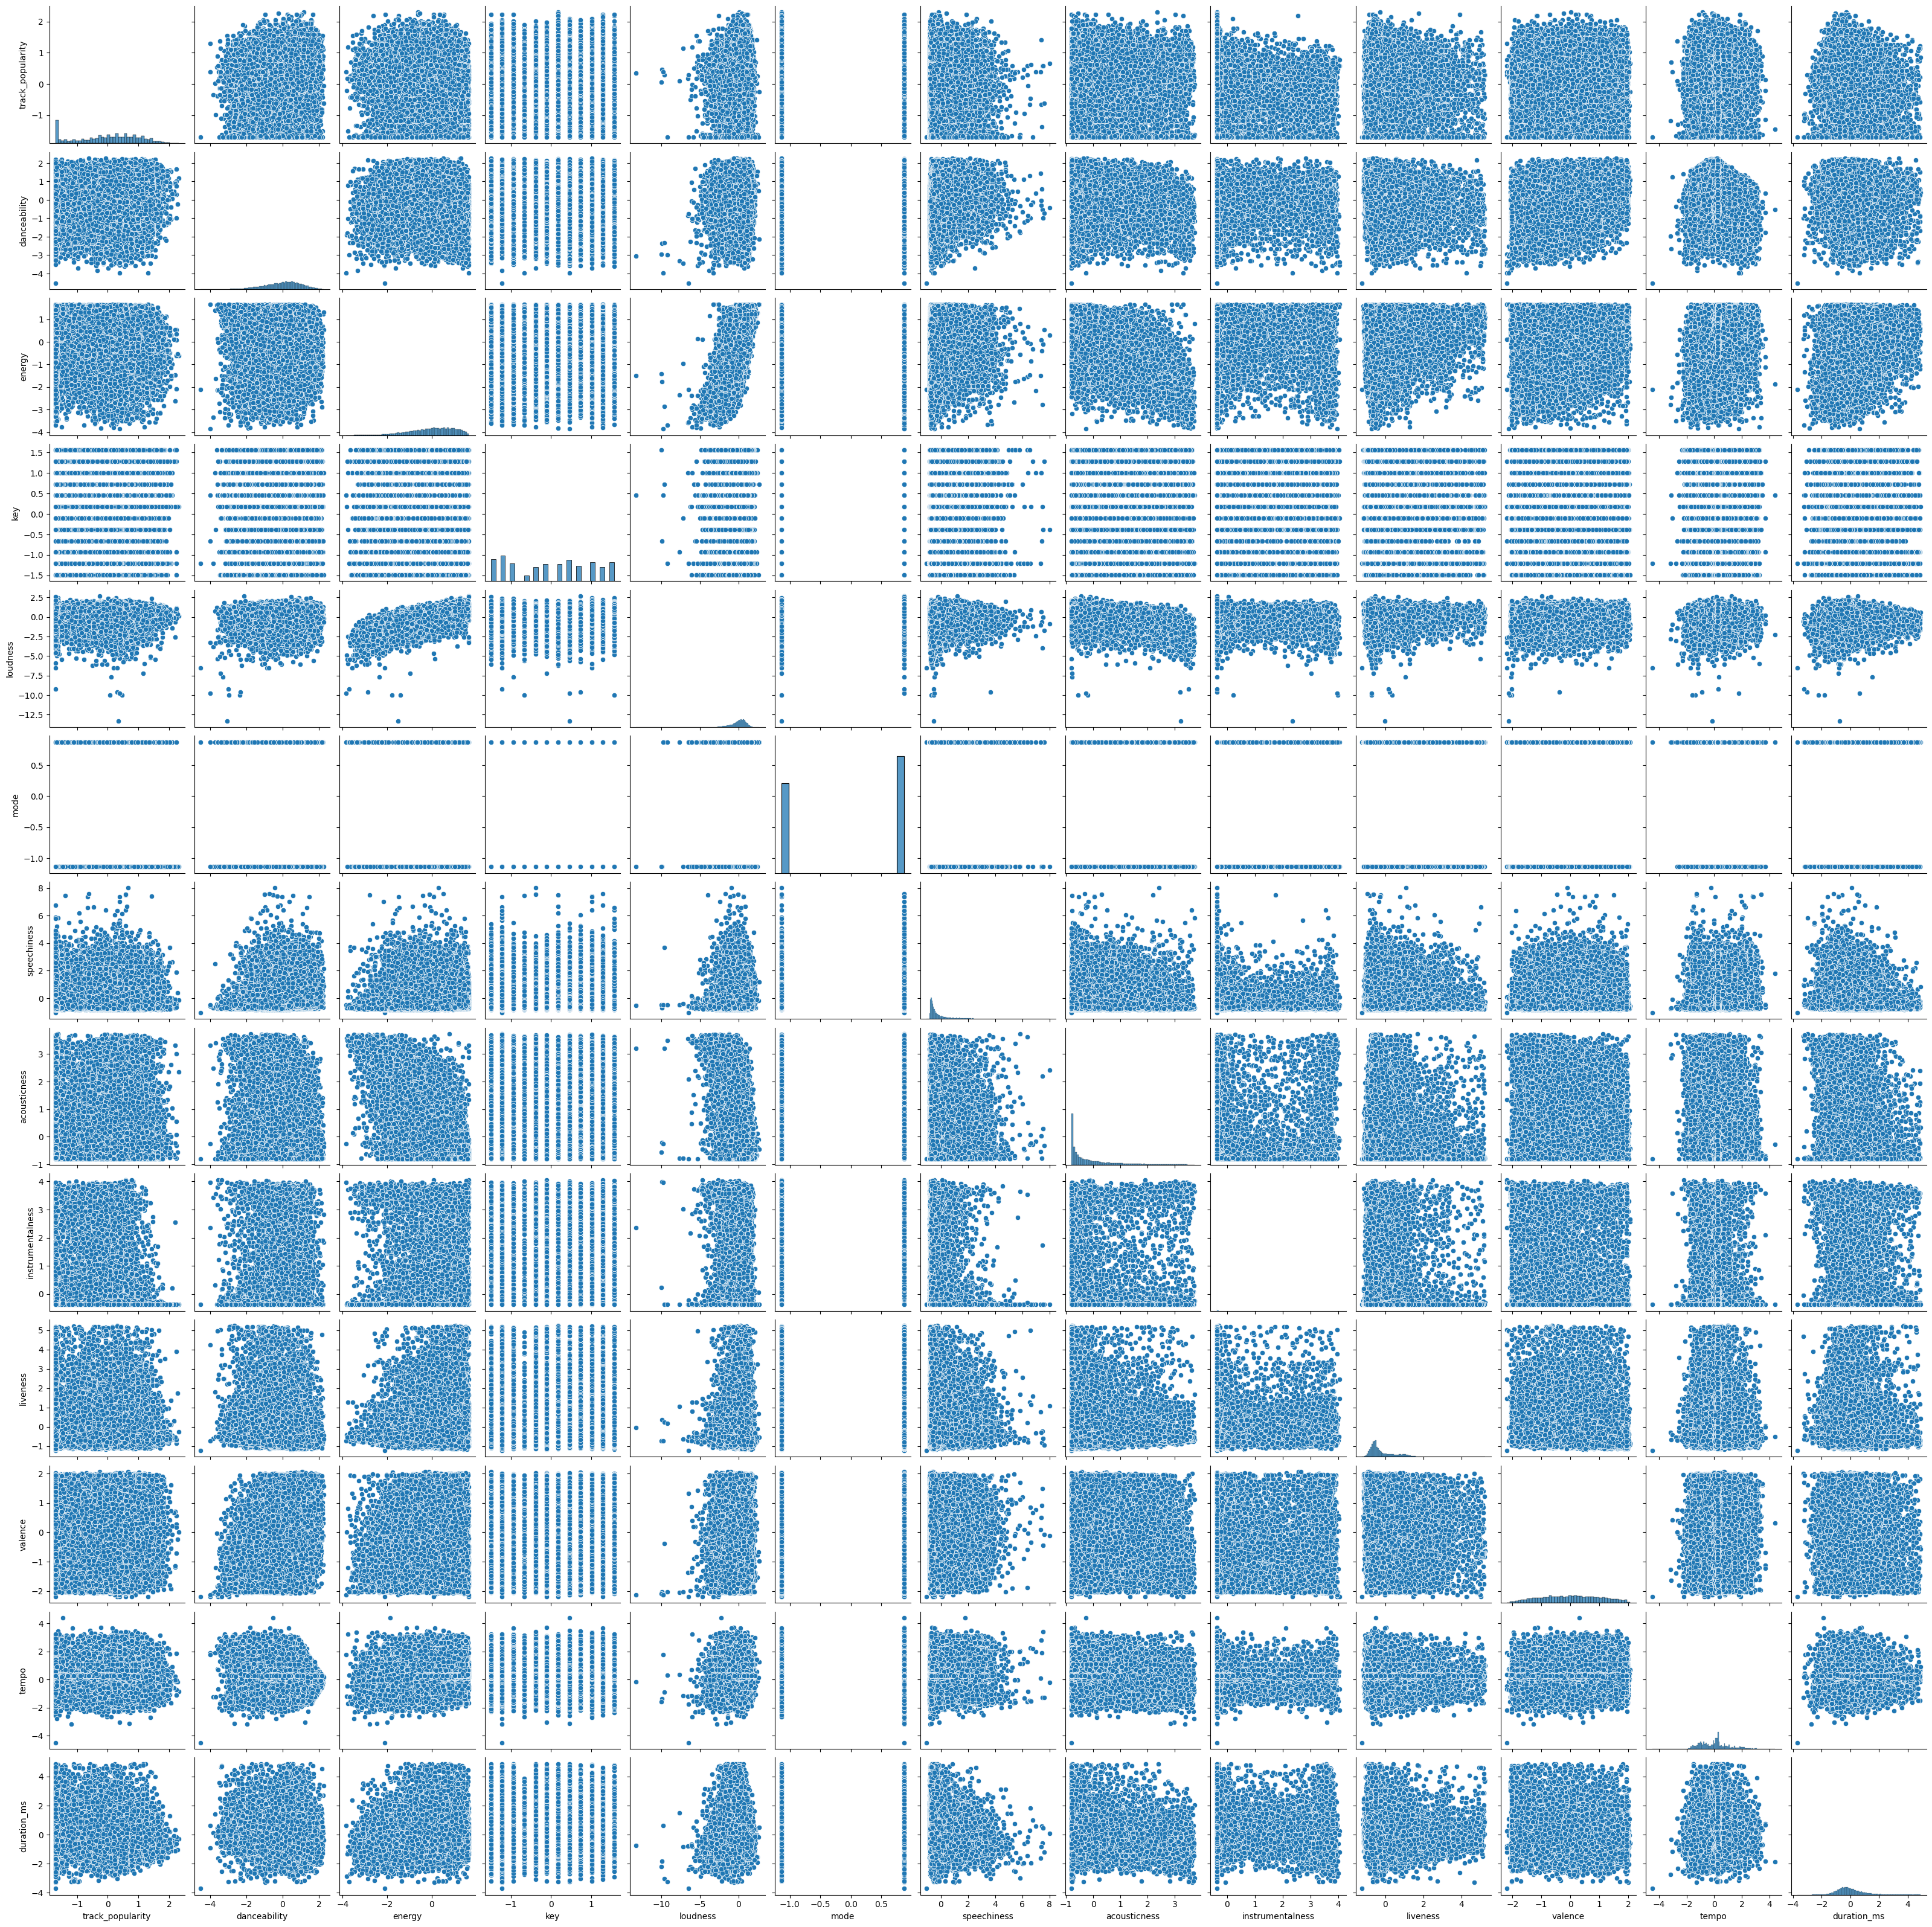

In [31]:
# Pairplot for initial visualization
sns.pairplot(df[features_to_scale])
plt.show()





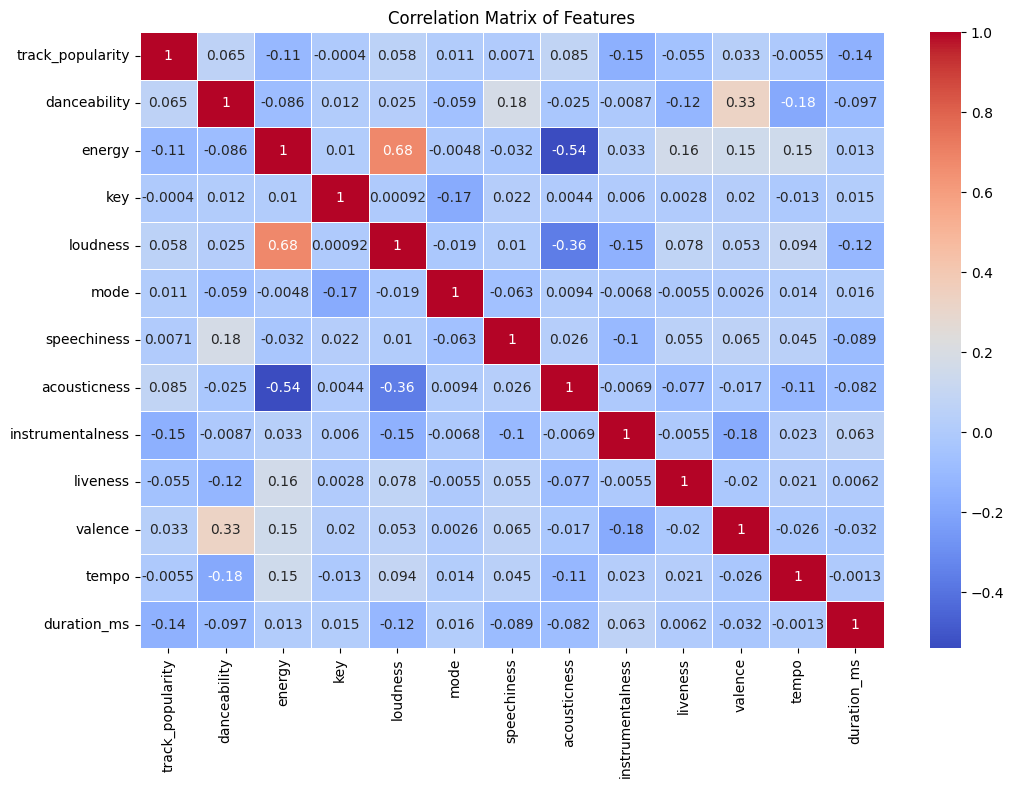

In [32]:

# Correlation matrix
correlation_matrix = df[features_to_scale].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


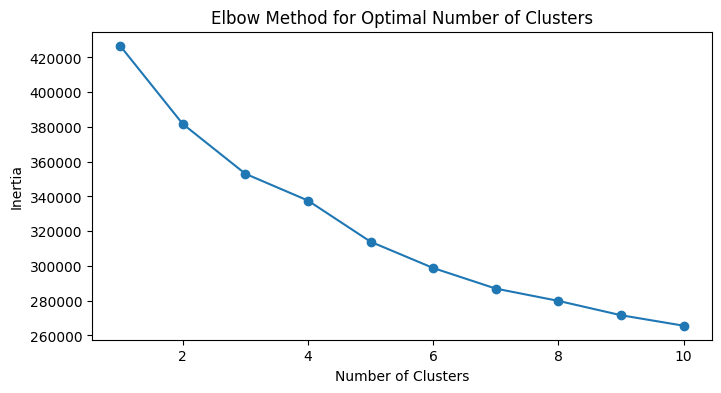

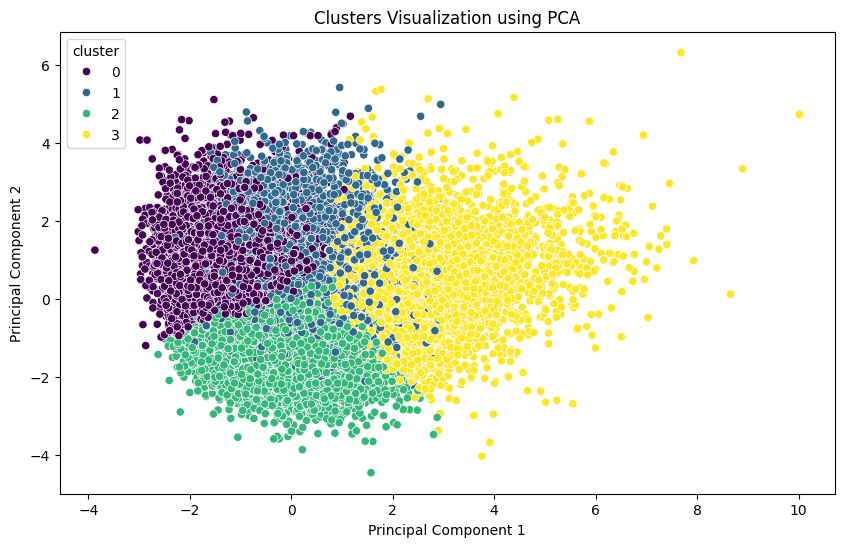

In [33]:
# Determine the number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df[features_to_scale])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, choose the number of clusters
optimal_clusters = 4  # This can vary based on the elbow plot

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features_to_scale])

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[features_to_scale])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [38]:
from prettytable import PrettyTable

# Function to recommend tracks based on genre and prettytable for formatted output
def recommend_tracks_by_genre(df, genres, num_recommendations=5):
    print("Available genres:")
    for i, genre in enumerate(genres, 1):
        print(f"{i}. {genre}")

    # Ask user to choose a genre
    while True:
        try:
            choice = int(input("Enter the number corresponding to the genre you like: "))
            if 1 <= choice <= len(genres):
                selected_genre = genres[choice - 1]
                break
            else:
                print("Invalid choice. Please enter a number within the range.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    recommendations = df[df['playlist_genre'] == selected_genre].sample(num_recommendations)
    table = PrettyTable()
    table.field_names = ["Track Name", "Track Artist"]
    for _, row in recommendations.iterrows():
        table.add_row([row['track_name'], row['track_artist']])
    return table, selected_genre  # Return both the table and the selected genre

# Available genre options
genres = ["pop", "rap", "rock", "latin", "r&b", "edm"]

# Example: Recommend 5 tracks based on user's chosen genre
recommended_tracks, selected_genre = recommend_tracks_by_genre(df, genres)
print(f"The recommended songs from {selected_genre} are: ") 
print(recommended_tracks)


Available genres:
1. pop
2. rap
3. rock
4. latin
5. r&b
6. edm


Enter the number corresponding to the genre you like:  1


The recommended songs from pop are: 
+------------------------------------------------------------------+--------------+
|                            Track Name                            | Track Artist |
+------------------------------------------------------------------+--------------+
| Night Riders (feat. Travi$ Scott, 2 Chainz, Pusha T & Mad Cobra) | Major Lazer  |
|                           Gemini Feed                            |    BANKS     |
|                       No Me Conoce - Remix                       | Jhay Cortez  |
|                    Marzipan (If You Love Him)                    |   No Coast   |
|                          Fade Into You                           |    Bjonr     |
+------------------------------------------------------------------+--------------+
